# Punktpartikkel i 2D

### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 1

Det elektriske felt og potensial for en punktpartikkel er allerede kjent i vilkårlig dimensjon. Hensikten med denne øvingen er å lære hvordan man håndterer numerikk i flere dimensjoner, både mht. de forskjellige metodene som fins for å plotte 2-dimensjonale systemer, og bruk av meshgrids. Det forventes at bruk av 1-dimensjonale arrays er kjent fra tidligere. 

### Oppgave 1: Elektrisk Potensial

Fra Coloumbs lov er det kjent at det elektriske potensialet i 2 dimensjoner en avstand, $r = \sqrt{x^2 + y^2}$, fra en punktpartikkel med ladning $q$ er gitt ved 
\begin{equation}
V(r) = \frac{q}{4\pi \epsilon_0}\frac{1}{r}\text{,}
\end{equation}
hvor $\epsilon_0$ er den elektriske permittivitet i vakum. Første del av øvingen vil gå ut på å plotte dette potensialet for en punktpartikkel med ladning $q = e$ plassert i origo, mellom $\pm L = \pm 10\text{nm}$.

$\textbf{a)}$ Ofte når man jobber med numerikk er det hensiktsmessig å innføre nye dimensjonsløse variabler, f.eks. $v/c$ hvis man jobber med hastigheter nær lysets hastighet, eller $V/V_0$ om man jobber med et konstant potensial. Utfør et slikt variabelskifte på potensialet og posisjonen slik at de blir dimensjonsløse.

------------

\begin{equation}
r' = \frac{r}{L}
\end{equation} 



\begin{equation}
V' = \frac{V}{V_0} = \frac{L}{r} = \frac{1}{r'}
\end{equation}


----------------

$\textbf{b)}$ For å løse problemer i to dimensjoner er det nødvendig med en ny måte å diskretisere koordinatene. Det er ikke lenger tilstrekkelig med éndimensjonale $1 \times n$ arrays. Vi trenger enten en $n \times n$ array hvor hvert punkt er en 2-dimensjonal vektor, eller en separat $n \times n$ array for hver akse. I denne øvingen skal vi bruke den sistnevnte metoden, ved å bruke $\texttt{numpy}$s $\texttt{meshgrid}$ funksjon.

Bruk $\texttt{np.meshgrid}$ til å generere to variabler, $\texttt{xv}$ og $\texttt{yv}$, som inneholder $x$ og $y$ koordinater respektivt.

In [6]:
import numpy as np

# Define the spatial limits
L = 10e-9  
n = 100  

# Create 1D arrays for x and y
x = np.linspace(-L, L, n)
y = np.linspace(-L, L, n)

# Create 2D coordinate grids
xv, yv = np.meshgrid(x, y)

# Display shapes to verify
print("Shape of xv:", xv.shape)
print("Shape of yv:", yv.shape)


Shape of xv: (100, 100)
Shape of yv: (100, 100)


$\textbf{c)}$ Via bruk av array-operasjoner, lag en variabel $\texttt{V}$ som inneholder potensialet $V$ for alle $x$ og $y$. Merk at det her vil oppstå en singularitet i $\vec{r} = 0$ som må tas stilling til. En måte å håndtere dette problemet er å sette verdien for potensialet over en viss grense lik konstant, f.eks. $\texttt{V[}>\texttt{c]} = \texttt{c}$.

In [7]:
import matplotlib.pyplot as plt

q = 1.602e-19  
epsilon_0 = 8.854e-12  
V0 = q / (4 * np.pi * epsilon_0 * L)  


r = np.sqrt(xv**2 + yv**2)

# Compute potential V(r), avoiding singularity at r=0
V = V0 / r
V[r < (L / 100)] = V0 / (L / 100)  # Set a maximum cap to avoid singularity (V diverges to infinity as r --> 0)

$\textbf{d)}$ Plot det dimensjonsløse potensialet $V$ både som en heatmap og som en 3d overflate.

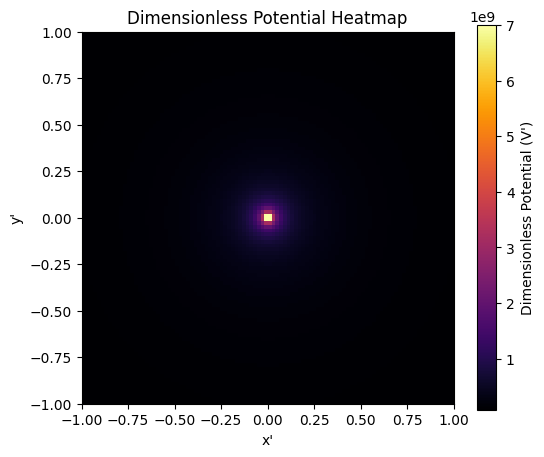

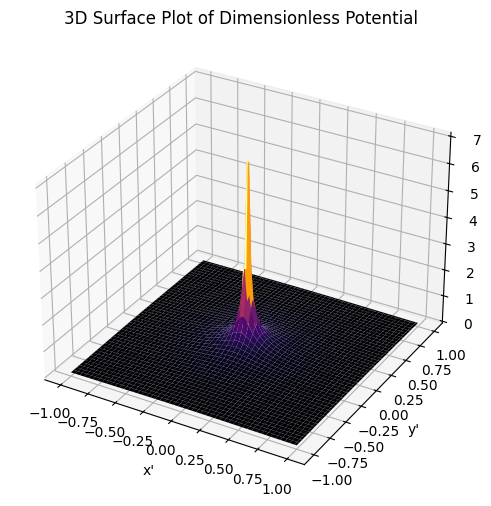

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Compute dimensionless potential V' = V / V0
V_dimless = V / V0

# Plot heatmap of dimensionless potential
plt.figure(figsize=(6,5))
plt.imshow(V_dimless, extent=[-1, 1, -1, 1], origin='lower', cmap='inferno')
plt.colorbar(label="Dimensionless Potential (V')")
plt.title("Dimensionless Potential Heatmap")
plt.xlabel("x'")
plt.ylabel("y'")
plt.show()

# Create 3D surface plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Convert x and y to dimensionless form
x_dimless = xv / L
y_dimless = yv / L

# Surface plot
ax.plot_surface(x_dimless, y_dimless, V_dimless, cmap='inferno', edgecolor='none')

# Labels and title
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.set_zlabel("V'")
ax.set_title("3D Surface Plot of Dimensionless Potential")

plt.show()

### Oppgave 2: Elektrisk Felt

Det elektriske felt for en punktpartikkel er også kjent fra Coloumbs lov, men generelt hvis man vet potensialet kan en finne det elektriske feltet ved å bruke gradienten, $\vec{E}=-\nabla V$. I én dimensjon er gradienten kun en vanlig derivert, og vi får $E(r) = -\frac{\text{d}V(r)}{\text{d}r}$. En kan beregne dette numerisk ved å diskretisere derivasjonen,
\begin{equation}
    E(r_\text{i}) = -\frac{V(r_\text{i+1})-V(r_\text{i-1})}{r_\text{i+1}-r_\text{i-1}}\text{.}
\end{equation}
Dette er et eksempel på en finite difference quotient, mer spesifikt er dette en $\textit{central finite difference quotient}$. 

$\textbf{a)}$ Utled en diskret formulering for gradienten i to dimensjoner med bruk av finite difference quotients.

----------------

Skriv her eller på papir


\begin{equation}
\nabla V = \left( \frac{\partial V}{\partial x}, \frac{\partial V}{\partial y} \right)
\end{equation}



\begin{equation}
\vec{E} = -\nabla V
\end{equation}


\begin{equation}
\frac{\partial V}{\partial x} \approx \frac{V(x_{i+1}, y_j) - V(x_{i-1}, y_j)}{x_{i+1} - x_{i-1}} \approx \frac{V_{i+1, j} - V_{i-1, j}}{2\Delta x}
\end{equation}


\begin{equation}
\frac{\partial V}{\partial y} \approx \frac{V(x_i, y_{j+1}) - V(x_i, y_{j-1})}{y_{j+1} - y_{j-1}} \approx \frac{V_{i, j+1} - V_{i, j-1}}{2\Delta y}
\end{equation}



\begin{equation}
E_{x, i, j} = - \frac{V_{i+1, j} - V_{i-1, j}}{2\Delta x}
\end{equation}

\begin{equation}
E_{y, i, j} = - \frac{V_{i, j+1} - V_{i, j-1}}{2\Delta y}
\end{equation}



------------------

$\textbf{b)}$ Lag en funksjon som tar inn et potensial $\texttt{V}$ som argument, regner ut gradienten i hvert punkt, og returnerer det elektriske feltet som to $n-2 \times n-2$ arrays (årsaken til at dimensjonen blir $n-2$ og ikke $n$ er at man ikke kan beregne gradienten på randen med central finite differences, men må da bruke enten det som kalles forward/backward finite differences).

$\textit{Hint:}$ Bruk array slicing for å gjøre koden mer effektiv.

In [9]:
def compute_electric_field(V, dx, dy):
    Ex = -(V[2:, 1:-1] - V[:-2, 1:-1]) / (2 * dx)
    Ey = -(V[1:-1, 2:] - V[1:-1, :-2]) / (2 * dy)
    return Ex, Ey

dx = dy = 2 * L / (n - 1)  
Ex, Ey = compute_electric_field(V, dx, dy)




$\textbf{c)}$ Plot det dimensjonsløse elektriske feltet til en punktpartikkel i to dimensjoner ved bruk av $\texttt{matplotlib}$s $\texttt{quiverplot}$.

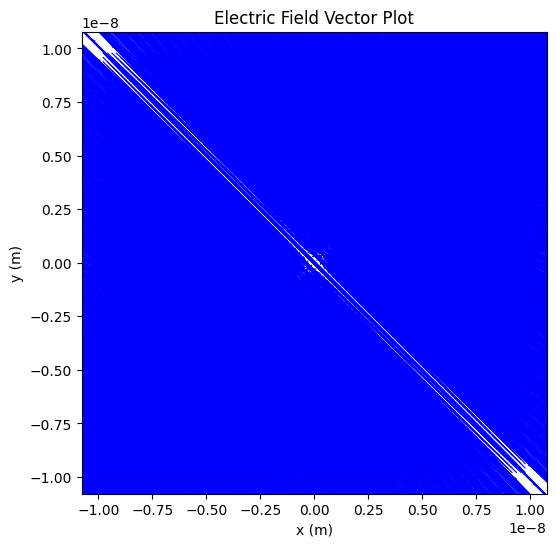

In [10]:
x_mid = x[1:-1]
y_mid = y[1:-1]
xv_mid, yv_mid = np.meshgrid(x_mid, y_mid)

plt.figure(figsize=(6,6))
plt.quiver(xv_mid, yv_mid, Ex, Ey, color='blue', scale=1e15) #visualise vector fields
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Electric Field Vector Plot")
plt.show()